# Laboratory practice № 8 (Modals controlles and observers)

Done by Dmitriy Novichkov

Variat №19

## Preparation

In [1]:
import scipy
import sympy
import numpy as np

import control as ctrl

import matplotlib.pyplot as plt


dt = 1e-3
t = sympy.symbols("t",real=True)

## Task 1

In [2]:
A = np.array([
    [4, 6, 4],
    [-4, -6, -6],
    [4, 4, 4],
])

B = np.array([
    [4],
    [-1],
    [1]
])

sigma_1 = [-1]*3
sigma_2 = [-2]*3
sigma_3 = [-1, -10, -100]
sigma_4 = [-2, -20, -200]
sigma_5 = [-1, -1+3j, -1-3j]
sigma_6 = [-2, -2+6j, -2-6j]


# A = np.array([
#     [12, -1, 14],
#     [6, 0, 6],
#     [-6, -2, -8],
# ])

# B = np.array([
#     [11],
#     [-7],
#     [7]
# ])

# sigma_1 = [-1]*3
# sigma_2 = [-2]*3
# sigma_3 = [-1, -10, -100]
# sigma_4 = [-2, -20, -200]
# sigma_5 = [-1, -1+3j, -1-3j]
# sigma_6 = [-2, -2+6j, -2-6j]


In [3]:
eigenvalues, eigenvectors = scipy.linalg.eig(A)

print("Eigenvalues of matrix A:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"λ_{i+1} = {eigenvalue:.4f}")

for i, eigenvalue in enumerate(eigenvalues):
    H = np.hstack((A - eigenvalue * np.eye(3), B))
    rank = np.linalg.matrix_rank(H)
    
    print(f"\nMatrix Hautus for λ_{i+1} = {eigenvalue:.4f}:")
    print(r"\begin{bmatrix}")
    for row in H:
        print(" & ".join([f"{x:.4f}" for x in row]) + r" \\")
    print(r"\end{bmatrix}")
    
    print(f"Rank of Hautus matrix: {rank}")
    
    if rank == 3:
        print(f"System is controllable for λ_{i+1} = {eigenvalue:.4f}.")
    else:
        print(f"System is not controllable for λ_{i+1} = {eigenvalue:.4f}.")

Eigenvalues of matrix A:
λ_1 = 2.0000+2.0000j
λ_2 = 2.0000-2.0000j
λ_3 = -2.0000+0.0000j

Matrix Hautus for λ_1 = 2.0000+2.0000j:
\begin{bmatrix}
2.0000-2.0000j & 6.0000+0.0000j & 4.0000+0.0000j & 4.0000+0.0000j \\
-4.0000+0.0000j & -8.0000-2.0000j & -6.0000+0.0000j & -1.0000+0.0000j \\
4.0000+0.0000j & 4.0000+0.0000j & 2.0000-2.0000j & 1.0000+0.0000j \\
\end{bmatrix}
Rank of Hautus matrix: 3
System is controllable for λ_1 = 2.0000+2.0000j.

Matrix Hautus for λ_2 = 2.0000-2.0000j:
\begin{bmatrix}
2.0000+2.0000j & 6.0000+0.0000j & 4.0000+0.0000j & 4.0000+0.0000j \\
-4.0000+0.0000j & -8.0000+2.0000j & -6.0000+0.0000j & -1.0000+0.0000j \\
4.0000+0.0000j & 4.0000+0.0000j & 2.0000+2.0000j & 1.0000+0.0000j \\
\end{bmatrix}
Rank of Hautus matrix: 3
System is controllable for λ_2 = 2.0000-2.0000j.

Matrix Hautus for λ_3 = -2.0000+0.0000j:
\begin{bmatrix}
6.0000+0.0000j & 6.0000+0.0000j & 4.0000+0.0000j & 4.0000+0.0000j \\
-4.0000+0.0000j & -4.0000+0.0000j & -6.0000+0.0000j & -1.0000+0.0000j \\

**-2 is not controllable, but stable**

In [4]:
sigma_2

[-2, -2, -2]

In [34]:
G_1 = np.array([
    [-2, 1, 0],
    [0, -2, 1],
    [0, 0, -2]
])
Y_1 = np.array([1,0,1]).reshape((1,-1))
# B@Y_1

In [35]:
P_1 = scipy.linalg.solve_sylvester(A,-G_1,B@Y_1)
P_1

array([[ 3.21792707e-01, -6.74224401e+13, -2.55084141e+28],
       [ 6.78207293e-01,  6.74224401e+13,  2.55084141e+28],
       [-5.00000000e-01, -2.40307181e-01,  8.84348240e+12]])

In [36]:
K_1 = -Y_1 @ np.linalg.inv(P_1)
K_1

array([[-1.93524902, -1.93524902, -1.93524902]])

In [37]:
scipy.linalg.eigvals(A + B@K_1)

array([-1.87049804+0.79419081j, -1.87049804-0.79419081j,
       -2.        +0.j        ])

In [38]:
sys_1 = ctrl.ss(A + B@K_1,np.zeros((3,1)),np.zeros((1,3)),0)
sys_1

<LinearIOSystem:sys[5]:['u[0]']->['y[0]']>

In [10]:
time_1 = np.linspace(0,10,int(10/dt))

In [39]:
y_1 = ctrl.initial_response(sys_1,time_1,X0=np.ones((3,1)))

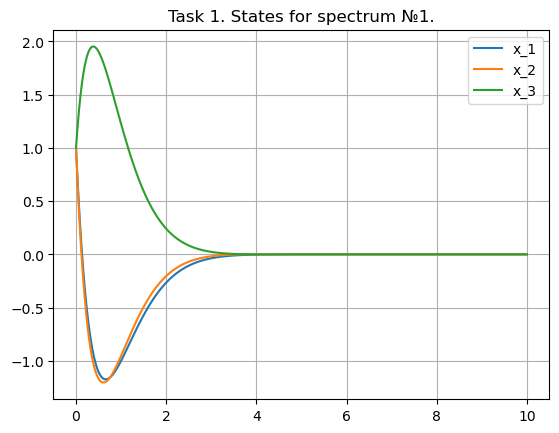

In [40]:
plt.plot(time_1,y_1.states[0,:],label="x_1")
plt.plot(time_1,y_1.states[1,:],label="x_2")
plt.plot(time_1,y_1.states[2,:],label="x_3")
plt.title("Task 1. States for spectrum №1.")
plt.grid()
plt.legend()

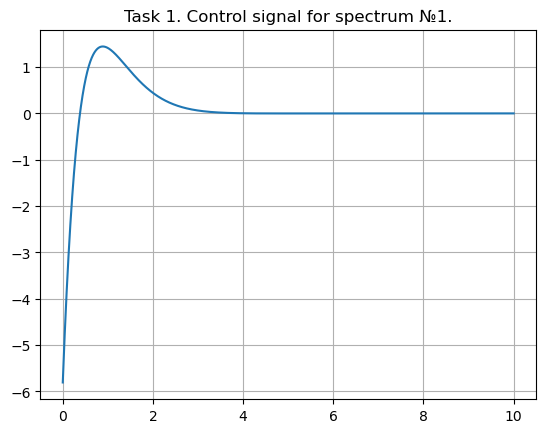

In [13]:
plt.plot(time_1,(K_1@y_1.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №1.")
plt.grid()

In [14]:
sigma_4

[-2, -20, -200]

In [15]:
G_2 = np.array([
    [-2, 0, 0],
    [0, -20, 0],
    [0, 0, -200,],
])
Y_2 = np.array([0,1,1]).reshape((1,-1))
P_2 = scipy.linalg.solve_sylvester(A,-G_2,B@Y_2)
K_2 = -Y_2 @ np.linalg.pinv(P_2)
K_2

array([[  26.08,  164.16, -164.16]])

In [16]:
scipy.linalg.eigvals(A + B@K_2)

array([-200.+0.j,  -20.+0.j,   -2.+0.j])

In [17]:
sys_2 = ctrl.ss(A + B@K_2,np.zeros((3,1)),np.zeros((1,3)),0)
time_2 = np.linspace(0,10,int(1/dt))
y_2 = ctrl.initial_response(sys_2,time_2,X0=np.ones((3,1)))

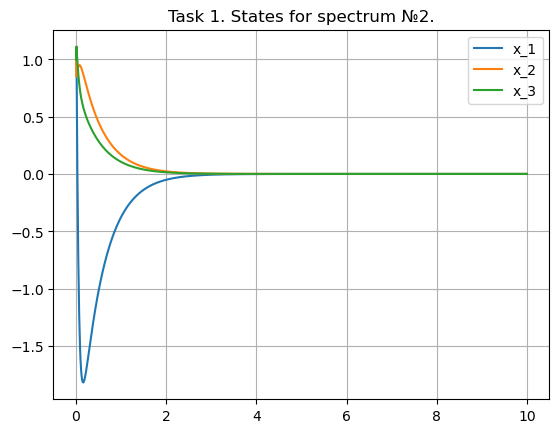

In [18]:
plt.plot(time_2,y_2.states[0,:],label="x_1")
plt.plot(time_2,y_2.states[1,:],label="x_2")
plt.plot(time_2,y_2.states[2,:],label="x_3")
plt.title("Task 1. States for spectrum №2.")
plt.grid()
plt.legend()

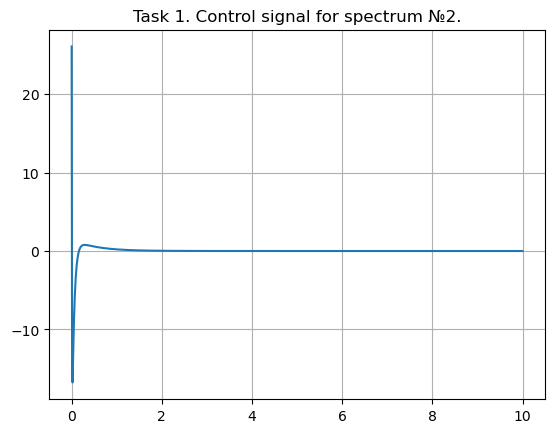

In [19]:
plt.plot(time_2,(K_2@y_2.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №2.")
plt.grid()

In [20]:
sigma_6

[-2, (-2+6j), (-2-6j)]

In [21]:
G_3 = np.array([
    [-2, 0, 0],
    [0, -2, 6],
    [0, -6, -2]
])
Y_3 = np.array([0,1,1]).reshape((1,-1))
P_3 = scipy.linalg.solve_sylvester(A,-G_3,B@Y_3)
K_3 = -Y_3 @ np.linalg.pinv(P_3)
K_3

array([[-1.28,  1.44, -1.44]])

In [22]:
scipy.linalg.eigvals(A + B@K_3)

array([-2.+6.j, -2.-6.j, -2.+0.j])

In [23]:
sys_3 = ctrl.ss(A + B@K_3,np.zeros((3,1)),np.zeros((1,3)),0)
time_3 = np.linspace(0,10,int(10/dt))
y_3 = ctrl.initial_response(sys_3,time_3,X0=np.ones((3,1)))

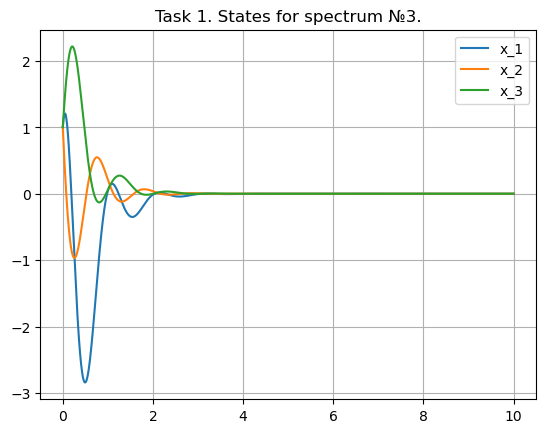

In [24]:
plt.plot(time_3,y_3.states[0,:],label="x_1")
plt.plot(time_3,y_3.states[1,:],label="x_2")
plt.plot(time_3,y_3.states[2,:],label="x_3")
plt.title("Task 1. States for spectrum №3.")
plt.grid()
plt.legend()

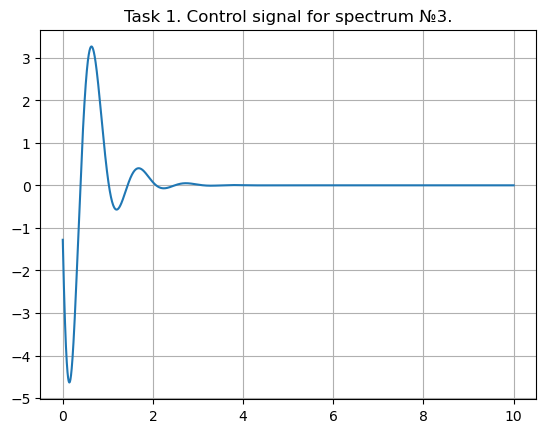

In [25]:
plt.plot(time_3,(K_3@y_3.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №3.")
plt.grid()

## Task 2

In [105]:
A = np.array([
    [25, 40, 18, -30],
    [-17, -27, -13, 20],
    [-10, -14, -7, 14],
    [-7, -10, -6, 9]
])
C = np.array([1, 1, 1, -1]).reshape((1,-1))

sigma_2_1 = [-2]*4
sigma_2_2 = [-2, -20, -200, -2000]
sigma_2_3 = [-2+3j, -2-3j, -2+4j, -2-4j]

In [48]:
V = np.concatenate([
    C, C@A, C@A@A, C@A@A@A
])
V

array([[  1,   1,   1,  -1],
       [  5,   9,   4,  -5],
       [-33, -49, -25,  41],
       [-29, -57, -28,  29]])

In [49]:
np.linalg.matrix_rank(V)

4

In [50]:
J_P, J = sympy.Matrix(A).jordan_form()
J

Matrix([
[-3*I,  0, 0,   0],
[   0, -I, 0,   0],
[   0,  0, I,   0],
[   0,  0, 0, 3*I]])

In [54]:
import numpy as np
from control import ctrb, obsv


eigenvalues = np.linalg.eigvals(A)
print("Собственные числа матрицы A:", eigenvalues)

O = obsv(A, C) 
rank_O = np.linalg.matrix_rank(O)
n = A.shape[0] 

if rank_O == n:
    print("Система полностью наблюдаема.")
else:
    print("Система не полностью наблюдаема. Ранг матрицы наблюдаемости:", rank_O)

for lambda_i in eigenvalues:
    M = np.vstack((A - lambda_i * np.eye(n), C))  
    rank_M = np.linalg.matrix_rank(M)
    if rank_M == n:
        print(f"Собственное число {lambda_i} наблюдаемо.")
    else:
        print(f"Собственное число {lambda_i} ненаблюдаемо.")

unobservable_eigenvalues = [lambda_i for lambda_i in eigenvalues if np.linalg.matrix_rank(np.vstack((A - lambda_i * np.eye(n), C))) < n]
is_detectable = all(np.real(lambda_i) < 0 for lambda_i in unobservable_eigenvalues)

if is_detectable:
    print("Система обнаруживаема.")
else:
    print("Система не обнаруживаема.")

Собственные числа матрицы A: [ 1.24900090e-14+3.j  1.24900090e-14-3.j -1.95806912e-14+1.j
 -1.95806912e-14-1.j]
Система полностью наблюдаема.
Собственное число (1.2490009027033011e-14+2.999999999999955j) наблюдаемо.
Собственное число (1.2490009027033011e-14-2.999999999999955j) наблюдаемо.
Собственное число (-1.958069123508821e-14+0.9999999999999317j) наблюдаемо.
Собственное число (-1.958069123508821e-14-0.9999999999999317j) наблюдаемо.
Система обнаруживаема.


In [51]:
C@J_P

Matrix([[I, 1/2 + I/2, 1/2 - I/2, -I]])

### Spectrum 1

In [57]:
G_2_1 = np.array([
    [-2, 1, 0, 0],
    [0, -2, 1, 0],
    [0, 0, -2, 1],
    [0, 0, 0, -2]
])


Y_5_8 = np.ones((4,1))
Q_1 = scipy.linalg.solve_sylvester(G_2_1,-A,Y_5_8@C)
Q_1

array([[ 2.45224534,  4.09160307,  1.54020153, -2.87788915],
       [ 2.39658079,  4.01580701,  1.5159035 , -2.82925808],
       [ 2.08473373,  3.53798817,  1.32899408, -2.48047337],
       [ 1.21538462,  2.13846154,  0.76923077, -1.46153846]])

In [60]:
L_1 = np.linalg.inv(Q_1)@Y_5_8
L_1

array([[ -4.29166667],
       [  3.04166667],
       [-13.83333333],
       [ -7.08333333]])

In [61]:
scipy.linalg.eigvals(A + L_1@C)

array([-2.00141072+0.j        , -1.99999937+0.00141008j,
       -1.99999937-0.00141008j, -1.99859055+0.j        ])

In [62]:
sys_5 = ctrl.ss(A, [[0]]*4,C,0)
sys_5_obs = ctrl.ss(A + L_1@C,-L_1,C,0)

In [84]:
time_5 = np.linspace(0,10,int(10/dt))
y_5 = ctrl.initial_response(sys_5,time_5,X0=np.ones((4,1)))
y_5_obs = ctrl.forced_response(sys_5_obs,time_5,X0=np.array([[2],[0],[0],[-1]]),U=y_5.outputs)

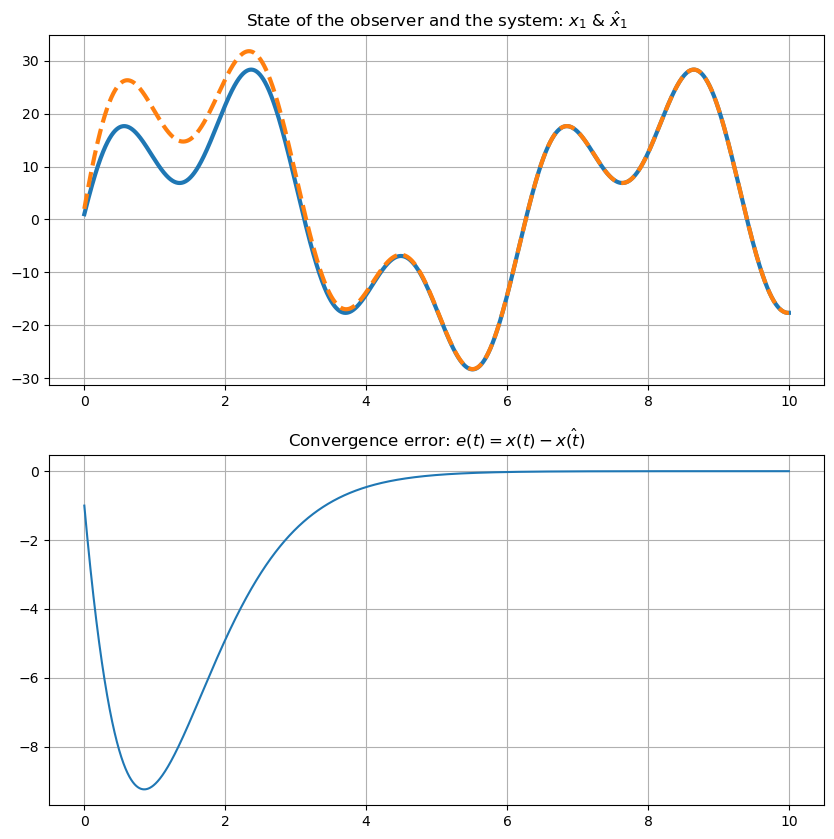

In [85]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_5,y_5.states[0,:],label="$x_1$", linewidth=3)
ax[0].plot(time_5,y_5_obs.states[0,:],label="$\hat{x}_1$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_1$ & $\hat{x}_1$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_5,y_5.states[0,:]-y_5_obs.states[0,:])

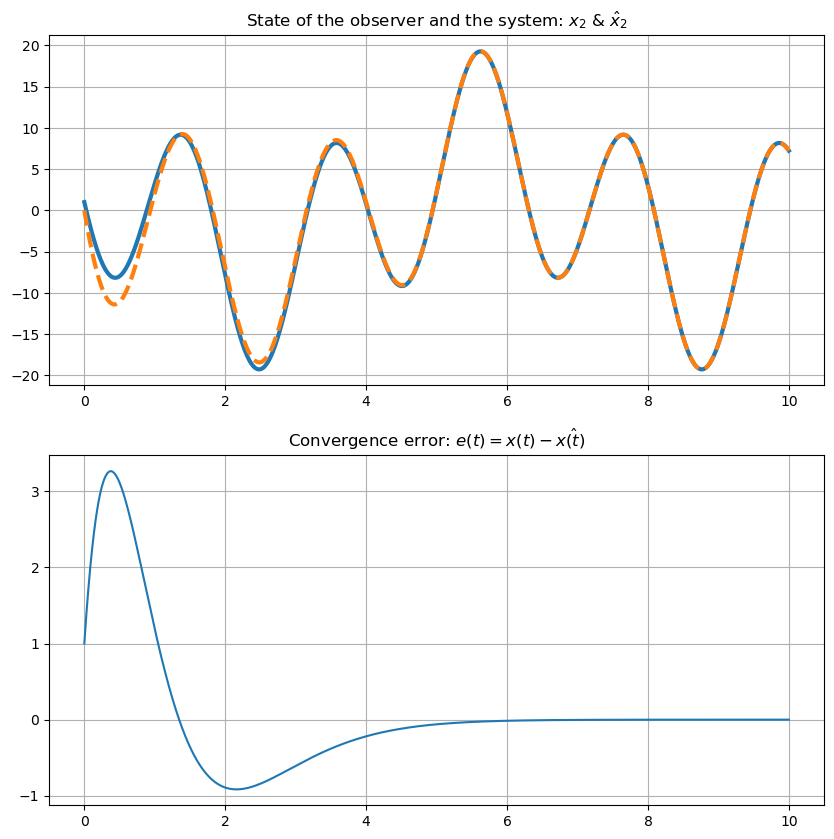

In [86]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_5,y_5.states[1,:],label="$x_2$", linewidth=3)
ax[0].plot(time_5,y_5_obs.states[1,:],label="$\hat{x}_2$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_2$ & $\hat{x}_2$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_5,y_5.states[1,:]-y_5_obs.states[1,:])

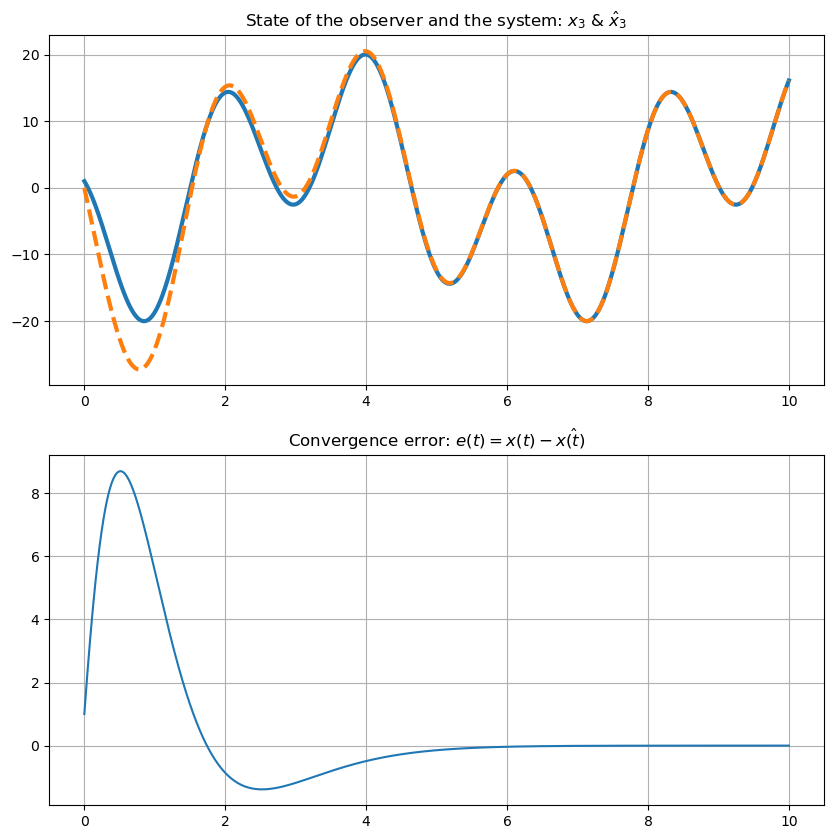

In [87]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_5,y_5.states[2,:],label="$x_3$", linewidth=3)
ax[0].plot(time_5,y_5_obs.states[2,:],label="$\hat{x}_3$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_3$ & $\hat{x}_3$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_5,y_5.states[2,:]-y_5_obs.states[2,:])

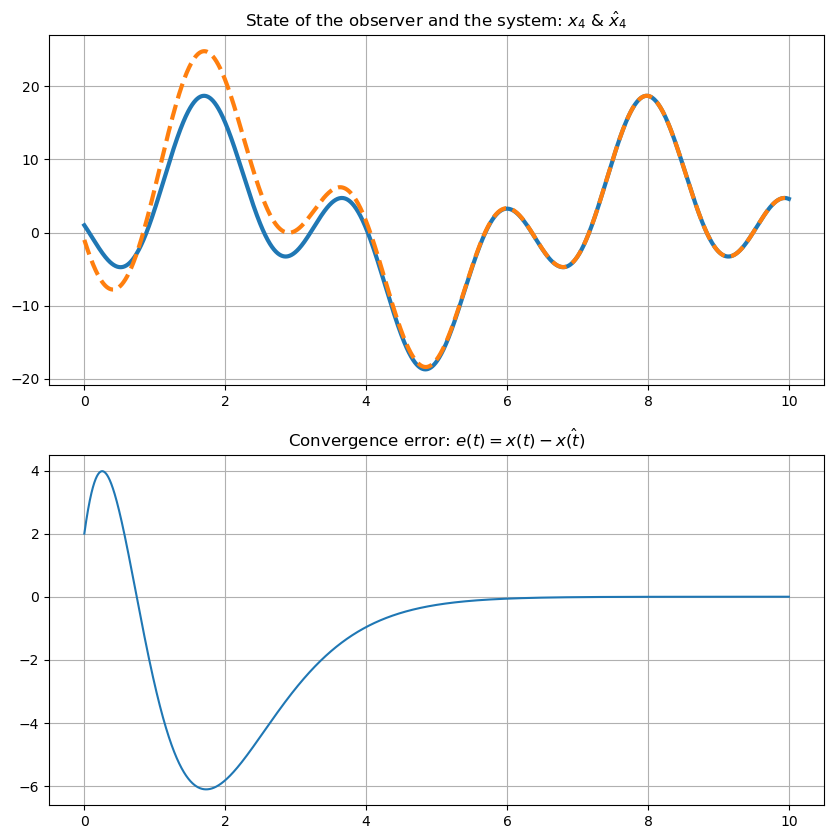

In [89]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_5,y_5.states[3,:],label="$x_4$", linewidth=3)
ax[0].plot(time_5,y_5_obs.states[3,:],label="$\hat{x}_4$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_4$ & $\hat{x}_4$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_5,y_5.states[3,:]-y_5_obs.states[3,:])

### Spectrum 2

In [90]:
G_2_2 = np.array([
    [-2, 0, 0, 0],
    [0, -20, 0, 0],
    [0, 0, -200, 0],
    [0, 0, 0, -2000]
])


Y_5_8 = np.ones((4,1))
Q_2 = scipy.linalg.solve_sylvester(G_2_2,-A,Y_5_8@C)
Q_2

array([[ 1.21538462e+00,  2.13846154e+00,  7.69230769e-01,
        -1.46153846e+00],
       [-3.36505923e-02, -2.18707510e-02, -3.71199142e-02,
         3.26750361e-02],
       [-4.87089412e-03, -4.76891212e-03, -4.89689325e-03,
         4.86989437e-03],
       [-4.98745877e-04, -4.97743879e-04, -4.98996877e-04,
         4.98744877e-04]])

In [93]:
L_2 = np.linalg.inv(Q_2)@Y_5_8
L_2

array([[-5499339.54167094],
       [  500727.04166714],
       [ 2440228.16666874],
       [-2556162.33333505]])

In [95]:
scipy.linalg.eigvals(A + L_2@C)

array([-1.99999999e+03+0.j, -2.00000006e+02+0.j, -1.99999996e+01+0.j,
       -1.99999994e+00+0.j])

In [96]:
sys_6 = ctrl.ss(A, [[0]]*4,C,0)
sys_6_obs = ctrl.ss(A + L_2@C,-L_2,C,0)

In [97]:
time_6 = np.linspace(0,10,int(10/dt))
y_6 = ctrl.initial_response(sys_6,time_6,X0=np.ones((4,1)))
y_6_obs = ctrl.forced_response(sys_6_obs,time_6,X0=np.array([[2],[0],[0],[-1]]),U=y_6.outputs)

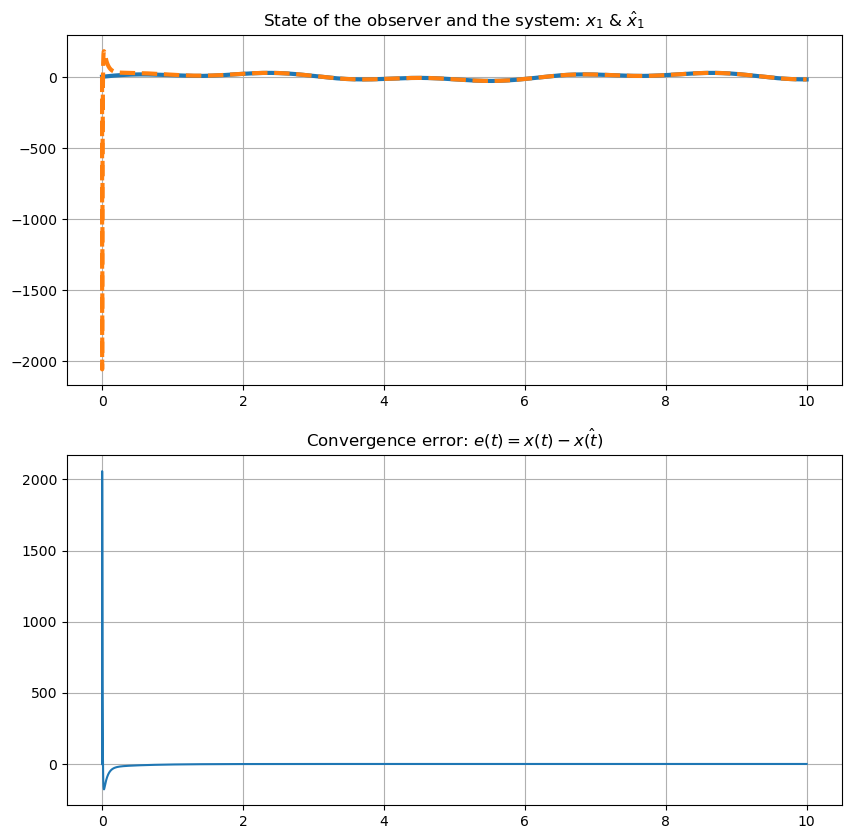

In [99]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_6,y_6.states[0,:],label="$x_1$", linewidth=3)
ax[0].plot(time_6,y_6_obs.states[0,:],label="$\hat{x}_1$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_1$ & $\hat{x}_1$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_6,y_6.states[0,:]-y_6_obs.states[0,:])

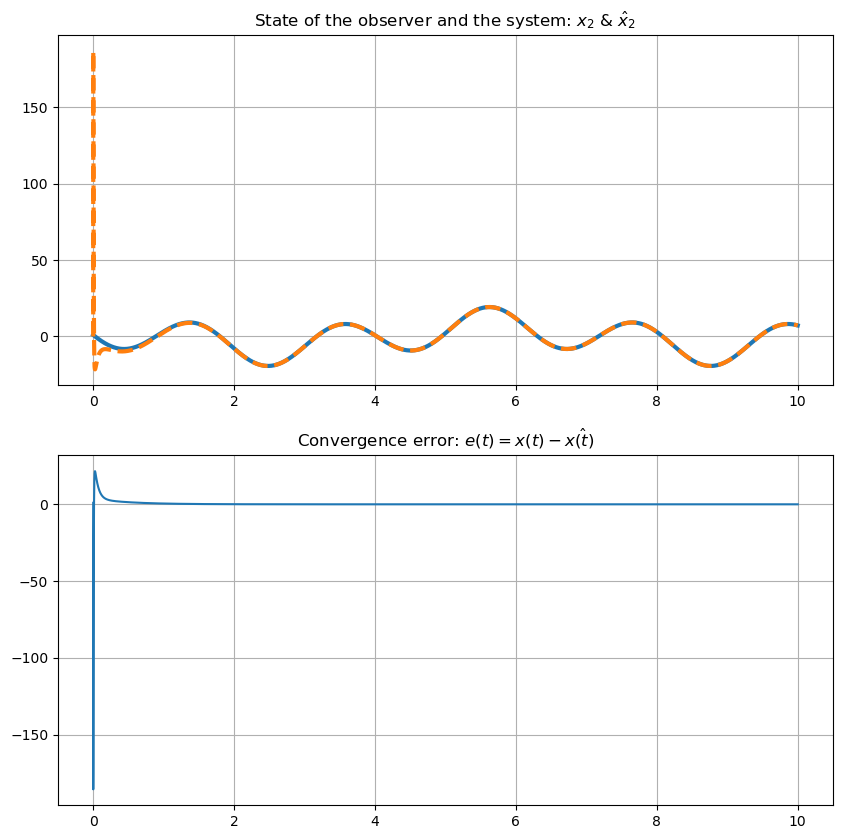

In [100]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_6,y_6.states[1,:],label="$x_2$", linewidth=3)
ax[0].plot(time_6,y_6_obs.states[1,:],label="$\hat{x}_2$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_2$ & $\hat{x}_2$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_6,y_6.states[1,:]-y_6_obs.states[1,:])

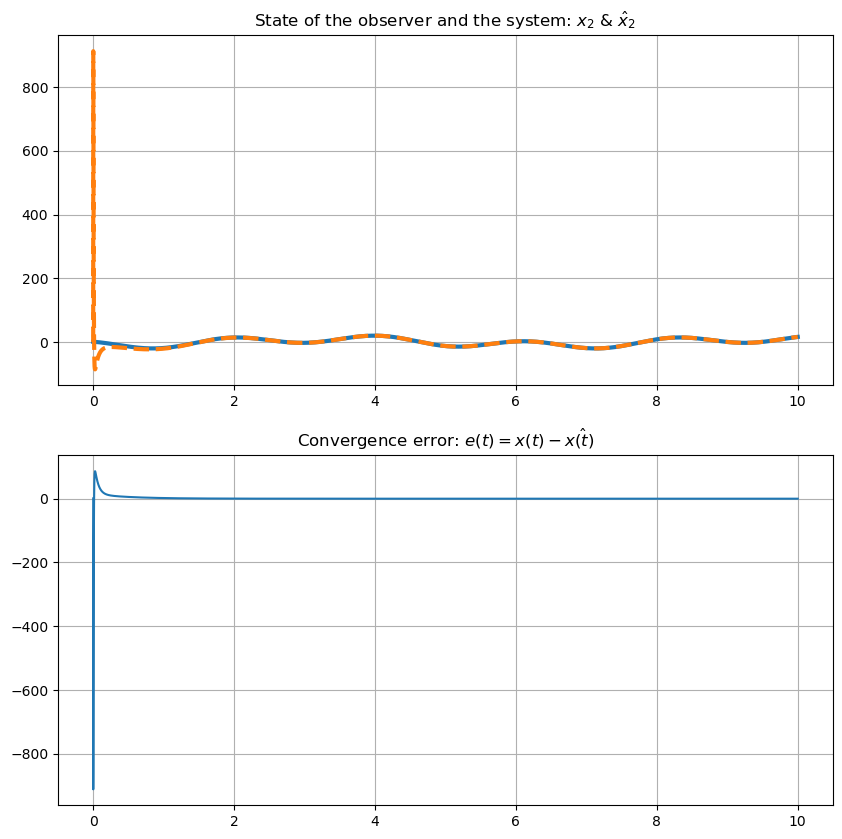

In [101]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_6,y_6.states[2,:],label="$x_3$", linewidth=3)
ax[0].plot(time_6,y_6_obs.states[2,:],label="$\hat{x}_3$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_2$ & $\hat{x}_2$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_6,y_6.states[2,:]-y_6_obs.states[2,:])

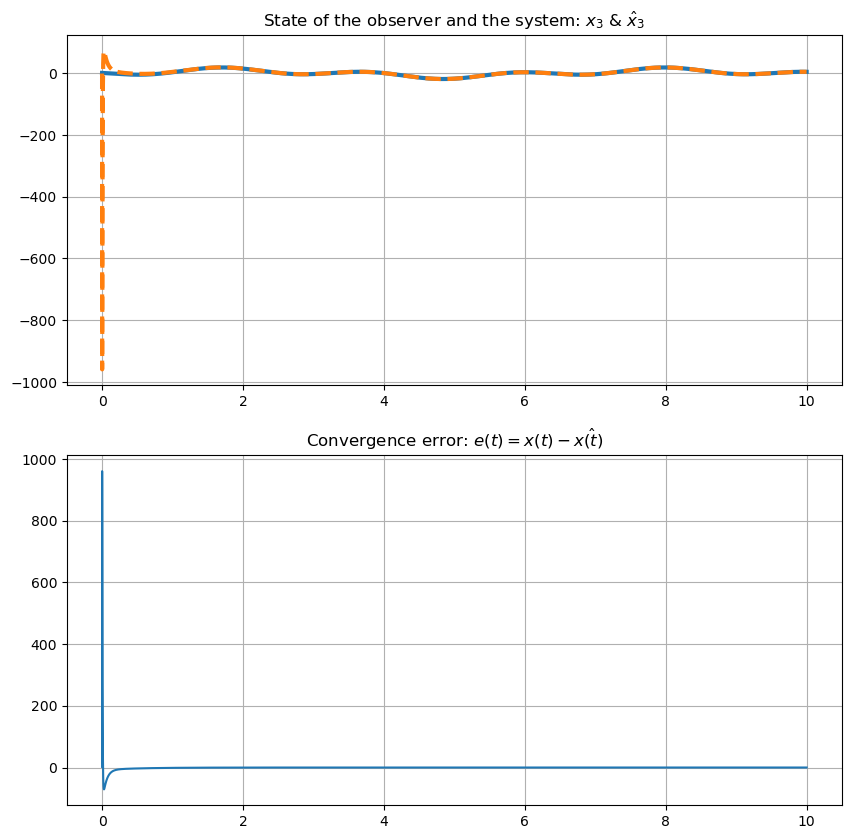

In [102]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_6,y_6.states[3,:],label="$x_3$", linewidth=3)
ax[0].plot(time_6,y_6_obs.states[3,:],label="$\hat{x}_3$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_3$ & $\hat{x}_3$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_6,y_6.states[3,:]-y_6_obs.states[3,:])

### Spectrum 3

In [103]:
sigma_2_3

[(-2+3j), (-2-3j), (-2+4j), (-2+4j)]

In [106]:
G_2_3 = np.array([
    [-2, 3, 0, 0],
    [-3, -2, 0, 0],
    [0, 0, -2, 4],
    [0, 0, -4, -2]
])


Y_5_8 = np.ones((4,1))
Q_3 = scipy.linalg.solve_sylvester(G_2_3,-A,Y_5_8@C)
Q_3

array([[ 0.2       ,  0.65      ,  0.1       , -0.25      ],
       [-1.3       , -2.05      , -0.95      ,  1.55      ],
       [-0.42693559, -0.4103198 , -0.36828988,  0.4988439 ],
       [-0.8402082 , -1.4129523 , -0.6255743 ,  0.98322406]])

In [107]:
L_3 = np.linalg.inv(Q_3)@Y_5_8
L_3

array([[-72.33333333],
       [  3.83333333],
       [ 14.33333333],
       [-46.16666667]])

In [108]:
scipy.linalg.eigvals(A + L_3@C)

array([-2.+4.j, -2.-4.j, -2.+3.j, -2.-3.j])

In [112]:
sys_7 = ctrl.ss(A, [[0]]*4,C,0)
sys_7_obs = ctrl.ss(A + L_3@C,-L_3,C,0)

In [113]:
time_7 = np.linspace(0,10,int(10/dt))
y_7 = ctrl.initial_response(sys_7,time_7,X0=np.ones((4,1)))
y_7_obs = ctrl.forced_response(sys_7_obs,time_7,X0=np.array([[2],[0],[0],[-1]]),U=y_7.outputs)

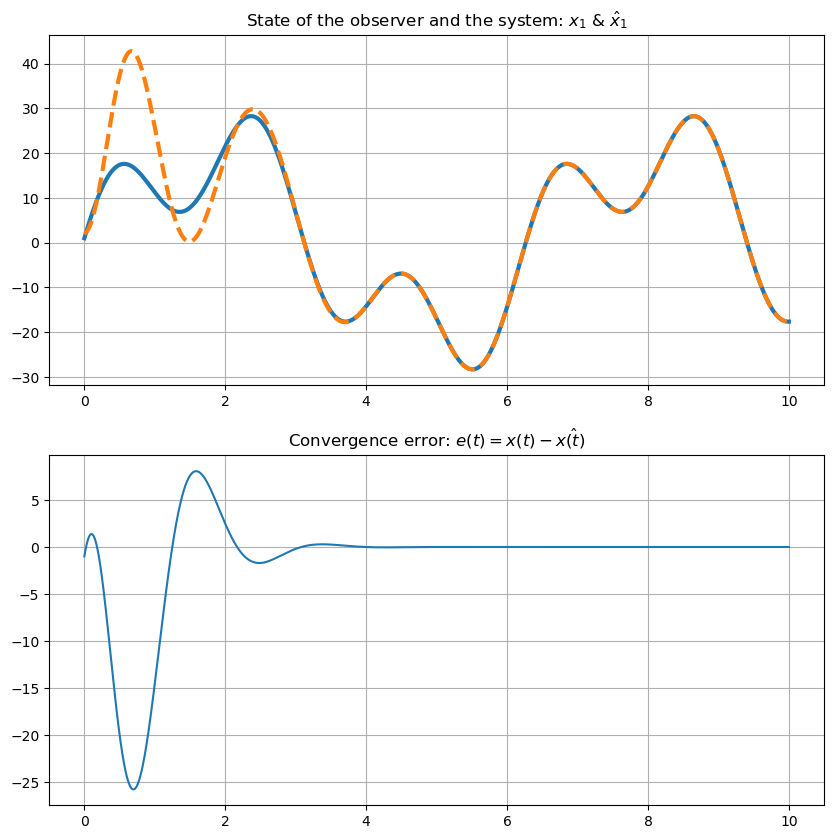

In [114]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_7,y_7.states[0,:],label="$x_1$", linewidth=3)
ax[0].plot(time_7,y_7_obs.states[0,:],label="$\hat{x}_1$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_1$ & $\hat{x}_1$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_7,y_7.states[0,:]-y_7_obs.states[0,:])

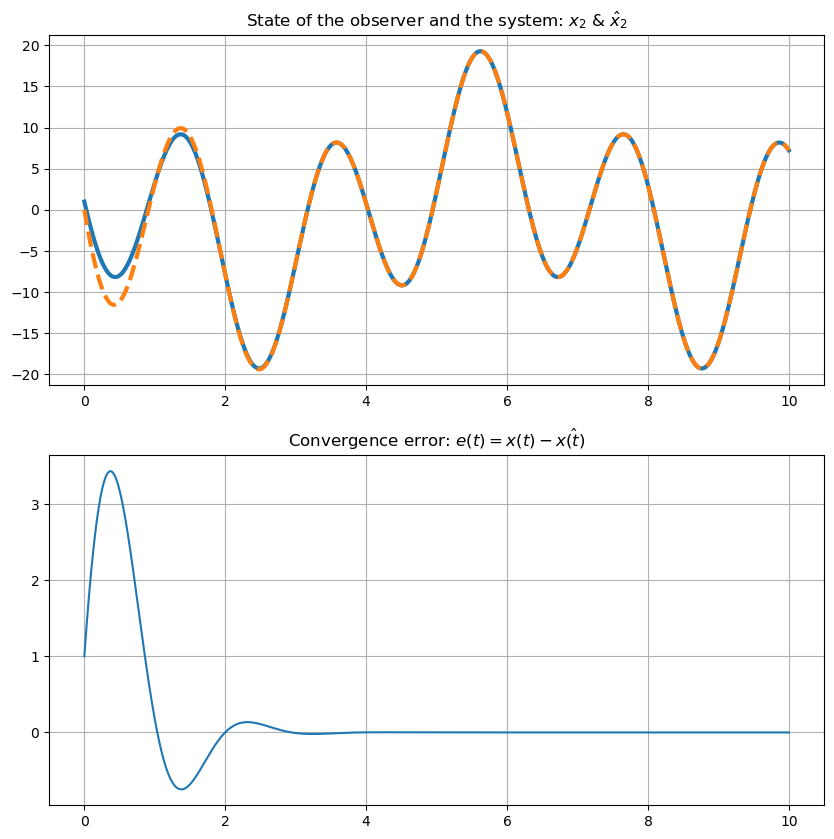

In [115]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_7,y_7.states[1,:],label="$x_2$", linewidth=3)
ax[0].plot(time_7,y_7_obs.states[1,:],label="$\hat{x}_2$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_2$ & $\hat{x}_2$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_7,y_7.states[1,:]-y_7_obs.states[1,:])

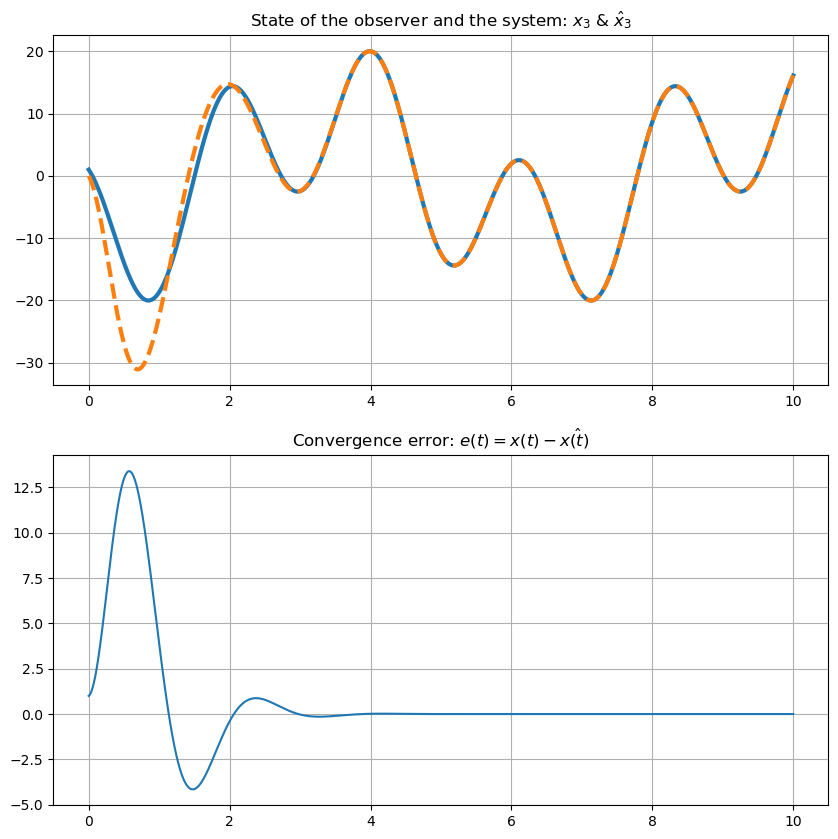

In [116]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_7,y_7.states[2,:],label="$x_3$", linewidth=3)
ax[0].plot(time_7,y_7_obs.states[2,:],label="$\hat{x}_3$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_3$ & $\hat{x}_3$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_7,y_7.states[2,:]-y_7_obs.states[2,:])

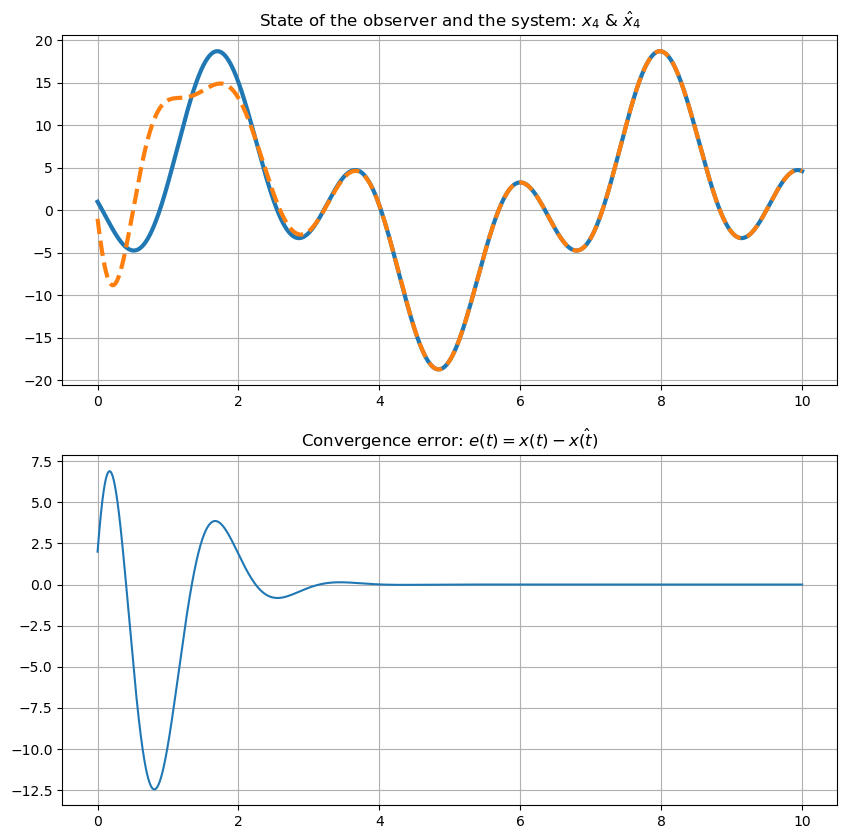

In [117]:
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(time_7,y_7.states[3,:],label="$x_4$", linewidth=3)
ax[0].plot(time_7,y_7_obs.states[3,:],label="$\hat{x}_4$", linestyle="--", linewidth=3)
ax[0].grid()
ax[0].set_title("State of the observer and the system: $x_4$ & $\hat{x}_4$")

ax[1].grid()
ax[1].set_title("Convergence error: $e(t)=x(t) - \hat{x(t)}$")
ax[1].plot(time_7,y_7.states[3,:]-y_7_obs.states[3,:])

## Task 3

In [118]:
A = np.array([
    [5, -7, -5, 1],
    [-7, 5, -1, 5],
    [-5, -1, 5, 7],
    [1, 5, 7, 5]
])
B = np.array([
    [5],
    [7],
    [1],
    [9]
])
C = np.array([
    [0, 0, 2, 2],
    [1, 1, -1, -1]
])
D = np.array([
    [4],
    [2]
])

In [119]:
J_P, J = sympy.Matrix(A).jordan_form()

In [120]:
J

Matrix([
[-8, 0, 0,  0],
[ 0, 4, 0,  0],
[ 0, 0, 8,  0],
[ 0, 0, 0, 16]])

In [121]:
J_P.inv()@B

Matrix([
[-1],
[ 5],
[ 2],
[ 3]])

In [122]:
C@J_P

Matrix([
[ 0, 0,  4,  4],
[-2, 2, -2, -2]])

In [186]:
G_cont = np.array([
    [-1, 0 ,0 ,0],
    [0, -3, 1, 0],
    [0, 0, -3, 1],
    [0, 0, 0, -3]
])
G_obs = np.array([
    [-1, 0 ,0 ,0],
    [0, -3, 1, 0],
    [0, 0, -3, 1],
    [0, 0, 0, -3]
])
Y_cont = np.array([1,1,1,1]).reshape((1,-1))
Y_obs = np.array([
    [1, 1],
    [1, 1],
    [0, 0],
    [1, 1]
])
P = scipy.linalg.solve_sylvester(A,-G_cont,B@Y_cont)
K = -Y_cont @ np.linalg.inv(P)
Q = scipy.linalg.solve_sylvester(G_obs,-A,Y_obs@C)
L = np.linalg.pinv(Q)@Y_obs

In [187]:
K

array([[ 7.04057255, -7.24337203, -1.09650788, -1.48919452]])

In [188]:
L

array([[ 35.60894097,  35.60894097],
       [-38.39648437, -38.39648437],
       [-12.02256944, -12.02256944],
       [-15.18988715, -15.18988715]])

In [189]:
scipy.linalg.eigvals(A + B@K)

array([-1.        +0.j        , -2.99968166+0.j        ,
       -3.00015917+0.00027565j, -3.00015917-0.00027565j])

In [190]:
scipy.linalg.eigvals(A + L@C)

array([-1.        +0.j        , -3.00035817+0.00062037j,
       -3.00035817-0.00062037j, -2.99928367+0.j        ])

In [191]:
A_new = np.block([
    [A + B@K, -B@K],
    [np.zeros_like(A), A + L@C]
])

In [192]:
sys = ctrl.ss(A_new,np.zeros((8,1)),np.zeros((1,8)),0)

In [207]:
time_ = np.linspace(0,15,int(15/dt))

In [208]:
y = ctrl.initial_response(sys,T=time_,X0=[-1,-1,-1,-1,2,2,2,2])

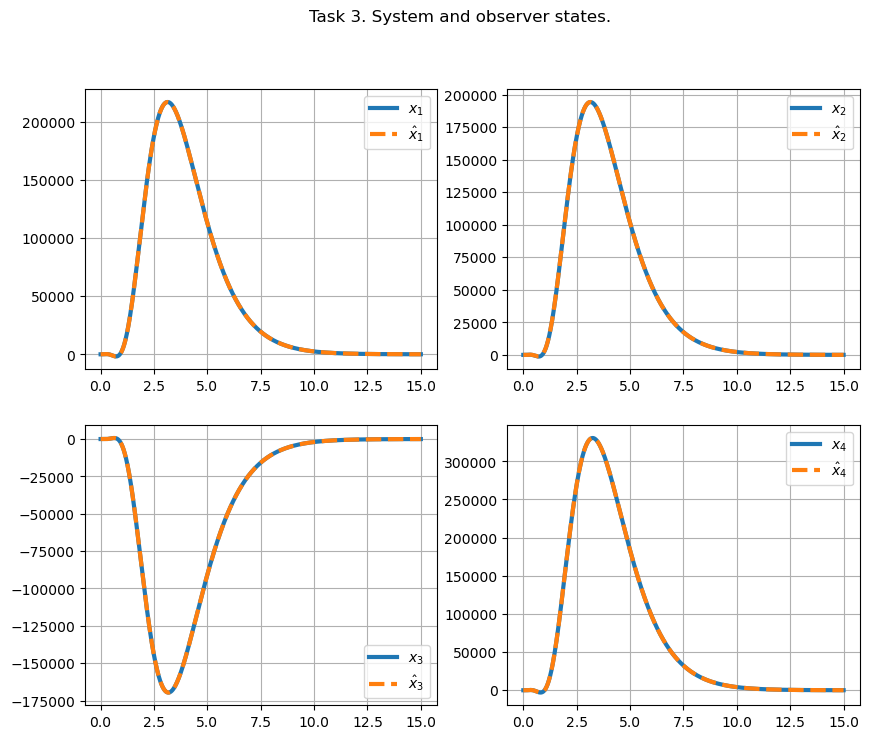

In [209]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Task 3. System and observer states.")
ax[0,0].plot(time_,y.states[0,:],label="$x_1$", linewidth=3)
ax[0,0].plot(time_,y.states[0,:]+y.states[4,:],linestyle="--",label="$\hat{x}_1$", linewidth=3)
ax[0,0].legend()
ax[0,0].grid()
ax[0,1].plot(time_,y.states[1,:],label="$x_2$", linewidth=3)
ax[0,1].plot(time_,y.states[1,:]+y.states[5,:],linestyle="--",label="$\hat{x}_2$", linewidth=3)
ax[0,1].legend()
ax[0,1].grid()
ax[1,0].plot(time_,y.states[2,:],label="$x_3$", linewidth=3)
ax[1,0].plot(time_,y.states[2,:]+y.states[6,:],linestyle="--",label="$\hat{x}_3$", linewidth=3)
ax[1,0].legend()
ax[1,0].grid()
ax[1,1].plot(time_,y.states[3,:],label="$x_4$", linewidth=3)
ax[1,1].plot(time_,y.states[3,:]+y.states[7,:],linestyle="--",label="$\hat{x}_4$", linewidth=3)
ax[1,1].legend()
ax[1,1].grid()

Text(0.5, 1.0, 'Task3. Observer errors.')

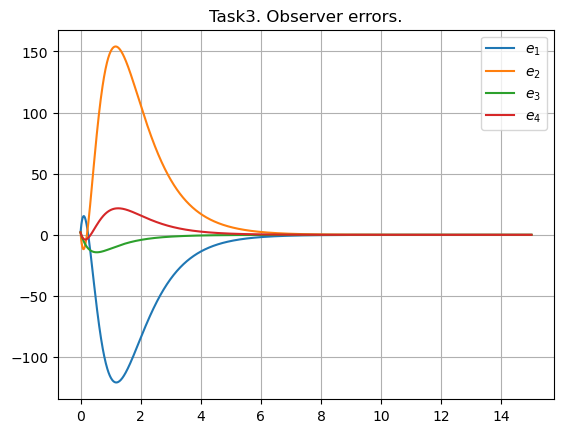

In [ ]:
plt.plot(time_,y.states[4,:],label="$e_1$")
plt.plot(time_,y.states[5,:],label="$e_2$")
plt.plot(time_,y.states[6,:],label="$e_3$")
plt.plot(time_,y.states[7,:],label="$e_4$")
plt.legend()
plt.grid()
plt.title("Task 3. Observer errors.")

Text(0.5, 1.0, 'Task 3. Control signal.')

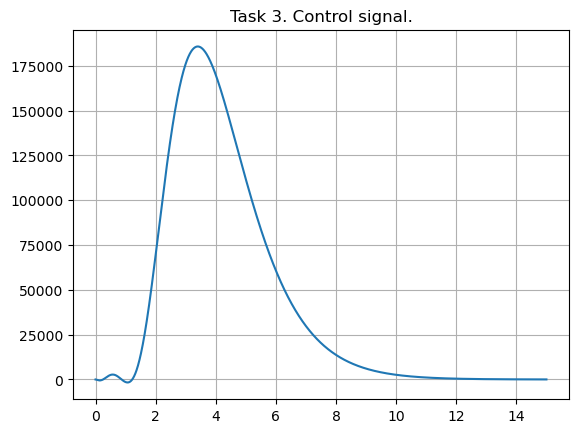

In [212]:
plt.plot(time_,(K@(y.states[4:,:]+y.states[:4,:])).reshape(-1))
plt.grid()
plt.title("Task 3. Control signal.")

## Task 4

In [219]:
A = np.array([
    [5, -7, -5, 1],
    [-7, 5, -1, 5],
    [-5, -1, 5, 7],
    [1, 5, 7, 5]
])
B = np.array([
    [5],
    [7],
    [1],
    [9]
])
C = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 0]
])
D = np.array([
    [4],
    [2]
])

In [220]:
eigenvalues = np.linalg.eigvals(A)
print("Собственные числа матрицы A:", eigenvalues)

C_ctrb = ctrl.ctrb(A, B)
rank_ctrb = np.linalg.matrix_rank(C_ctrb)
print("Ранг матрицы управляемости:", rank_ctrb)
if rank_ctrb == A.shape[0]:
    print("Система полностью управляема.")
else:
    print("Система не полностью управляема.")

O_obsv = ctrl.obsv(A, C)
rank_obsv = np.linalg.matrix_rank(O_obsv)
print("Ранг матрицы наблюдаемости:", rank_obsv)
if rank_obsv == A.shape[0]:
    print("Система полностью наблюдаема.")
else:
    print("Система не полностью наблюдаема.")

Собственные числа матрицы A: [-8. 16.  4.  8.]
Ранг матрицы управляемости: 4
Система полностью управляема.
Ранг матрицы наблюдаемости: 4
Система полностью наблюдаема.


In [273]:
G_cont = np.array([
    [-1, 0 ,0 ,0],
    [0, -3, 1, 0],
    [0, 0, -3, 1],
    [0, 0, 0, -3]
])
G_obs = np.array([
    [-1, 0 ,0 ,0],
    [0, -3, 1, 0],
    [0, 0, -3, 1],
    [0, 0, 0, -3]
])
Y_cont = np.array([1,1,1,1]).reshape((1,-1))
Y_obs = np.array([
    [1, 1],
    [1, 1],
    [0, 0],
    [1, 1]
])
P = scipy.linalg.solve_sylvester(A,-G_cont,B@Y_cont)
K = -Y_cont @ np.linalg.inv(P)
Q = scipy.linalg.solve_sylvester(G_obs,-A,Y_obs@C)
L = np.linalg.pinv(Q)@Y_obs

In [274]:
Q

array([[-0.05471522, -0.00242764,  0.08646125, -0.25639589],
       [ 0.01167219,  0.05055522,  0.10466741, -0.24910519],
       [-0.03295127, -0.02745689, -0.01531319,  0.00427865],
       [ 0.00943267,  0.04771018,  0.09965824, -0.24319891]])

Took $K$ from the previous task №3

In [275]:
K

array([[ 7.04057255, -7.24337203, -1.09650788, -1.48919452]])

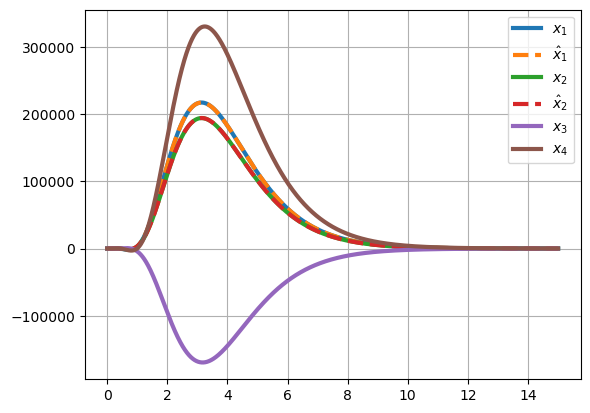

In [ ]:
A_new = np.block([
    [A + B@K, -B@K],
    [np.zeros_like(A), A + L@C]
])

sys = ctrl.ss(A_new,np.ones((8,1)),np.ones((1,8)),0)
time_ = np.linspace(0,15,int(15/dt))
y = ctrl.initial_response(sys,T=time_,X0=[-1,-1,-1,-1,2,2,2,2])


plt.plot(time_,y.states[0,:],label="$x_1$", linewidth=3)
plt.plot(time_,y.states[0,:]+y.states[4,:],linestyle="--",label="$\hat{x}_1$", linewidth=3)
plt.plot(time_,y.states[1,:],label="$x_2$", linewidth=3)
plt.plot(time_,y.states[1,:]+y.states[5,:],linestyle="--",label="$\hat{x}_2$", linewidth=3)
plt.plot(time_,y.states[2,:],label="$x_3$", linewidth=3)
plt.plot(time_,y.states[3,:],label="$x_4$", linewidth=3)
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Task 3. Control signal.')

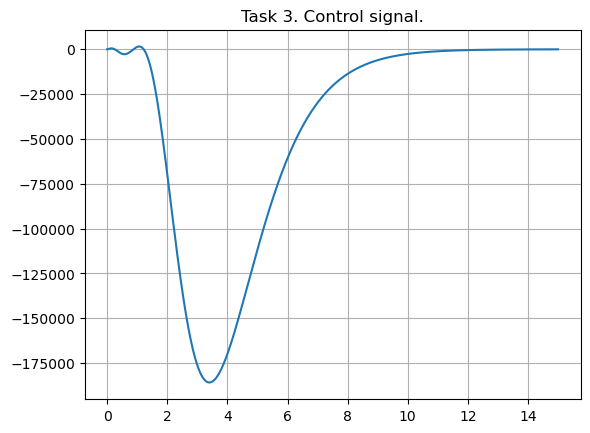

In [289]:
plt.plot(time_,(K@(y.states[4:,:]+y.states[:4,:])).reshape(-1))
plt.grid()
plt.title("Task 4. Control signal.")

Text(0.5, 1.0, 'Task 4. Observer errors.')

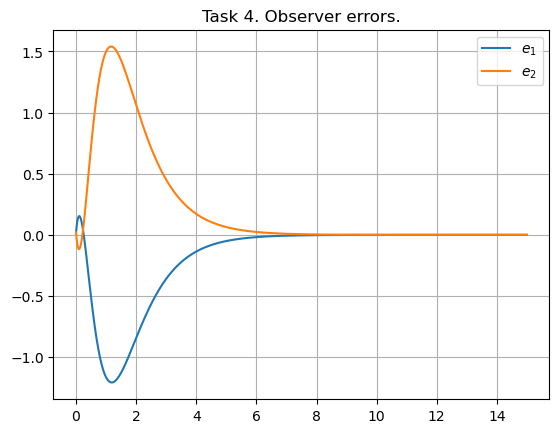

In [295]:
plt.plot(time_,y.states[4,:] / 100,label="$e_1$")
plt.plot(time_,y.states[5,:] / 100,label="$e_2$")
plt.legend()
plt.grid()
plt.title("Task 4. Observer errors.")

In [266]:
G = np.array([
    [-3, 1],
    [0, -3],
])
Y= np.array([
    [1, 0],
    [0, 1],
])

Q = scipy.linalg.solve_sylvester(G,-A,Y@C)
L = np.linalg.pinv(Q)@Y

In [267]:
Q

array([[-0.0657344 ,  0.00532624, -0.14781932, -0.12822748],
       [ 0.04771018,  0.00943267,  0.24319891, -0.09965824]])